# Washington DC Biking data | Hourly Bike Count Prediction
MBD O-1-5

### Notebook preperation

In [12]:
# Imports
%matplotlib inline


from My_Functions import * 
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from collections import defaultdict

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score,roc_curve
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict,validation_curve
from sklearn.ensemble import RandomForestRegressor
import datetime

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler,PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator , MultipleLocator
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression,LinearRegression, OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split , TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from matplotlib.gridspec import GridSpec
import plotly.tools as tls
import plotly
plotly.tools.set_credentials_file(username='Furqan92', api_key='22DfVN5rFRg79OYygN5h')
import plotly.plotly as py
from sklearn.decomposition import PCA
from pandas import DataFrame 
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter(action='ignore')
random_seed = 1234

In [2]:
# To automatically reload the function file 
%load_ext autoreload
%aimport My_Functions
%run My_Functions.py
%autoreload 1

# Data Exploration

In [100]:
# Data Import
daily_raw_data = pd.read_csv('day.csv')
hourly_raw_data=pd.read_csv('hour.csv')

In [101]:
hourly_raw_data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [102]:
daily_raw_data.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [103]:
daily_raw_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### DAILY DATA visuals

In [106]:
# Making a copy of daily data for graphs
graph_data_daily=daily_raw_data.copy()
graph_data_daily["dteday"]=graph_data_daily["dteday"].map(lambda x:  pd.to_datetime(x))

In [107]:
mpl_fig = plt.figure()
ax= plt.axes()
ax.plot(graph_data_daily['dteday'],graph_data_daily['cnt'])
ax.plot(graph_data_daily['dteday'],graph_data_daily['registered'])
ax.plot(graph_data_daily['dteday'],graph_data_daily['casual'])
#ax.legend(['cnt', 'registered', 'casual'], loc='upper left')
#ax.figure(figsize=(20,10))
# locator=MaxNLocator(prune='both',nbins=8)
# ax.xaxis.set_major_locator(locator)


plotly_fig=tls.mpl_to_plotly(mpl_fig)
plotly_fig['layout']['xaxis'] = {
   'tickmode': 'auto',
   'nticks': 10
    }
plotly_fig['layout']['showlegend'] = True
plotly_fig['layout'] = {'width':800}
plotly_fig['layout']['title'] = 'Daily Bike Users'
py.iplot(plotly_fig,filename='Daily_Bike_Users')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Furqan92/0 or inside your plot.ly account where it is named 'Daily_Bike_Users'


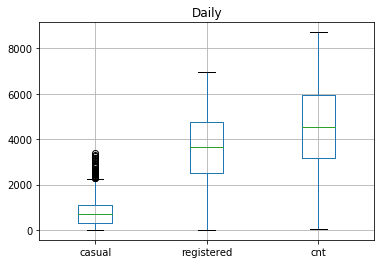

In [108]:
graph_data_daily.boxplot(column = ['casual','registered','cnt'])
plt.title('Daily')
plt.show()

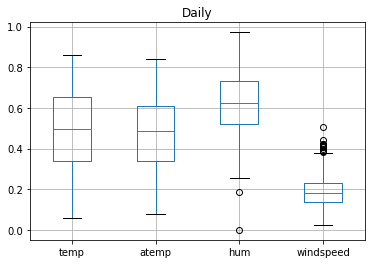

In [109]:
graph_data_daily.boxplot(column = ['temp','atemp','hum','windspeed'])
plt.title('Daily')
plt.show()

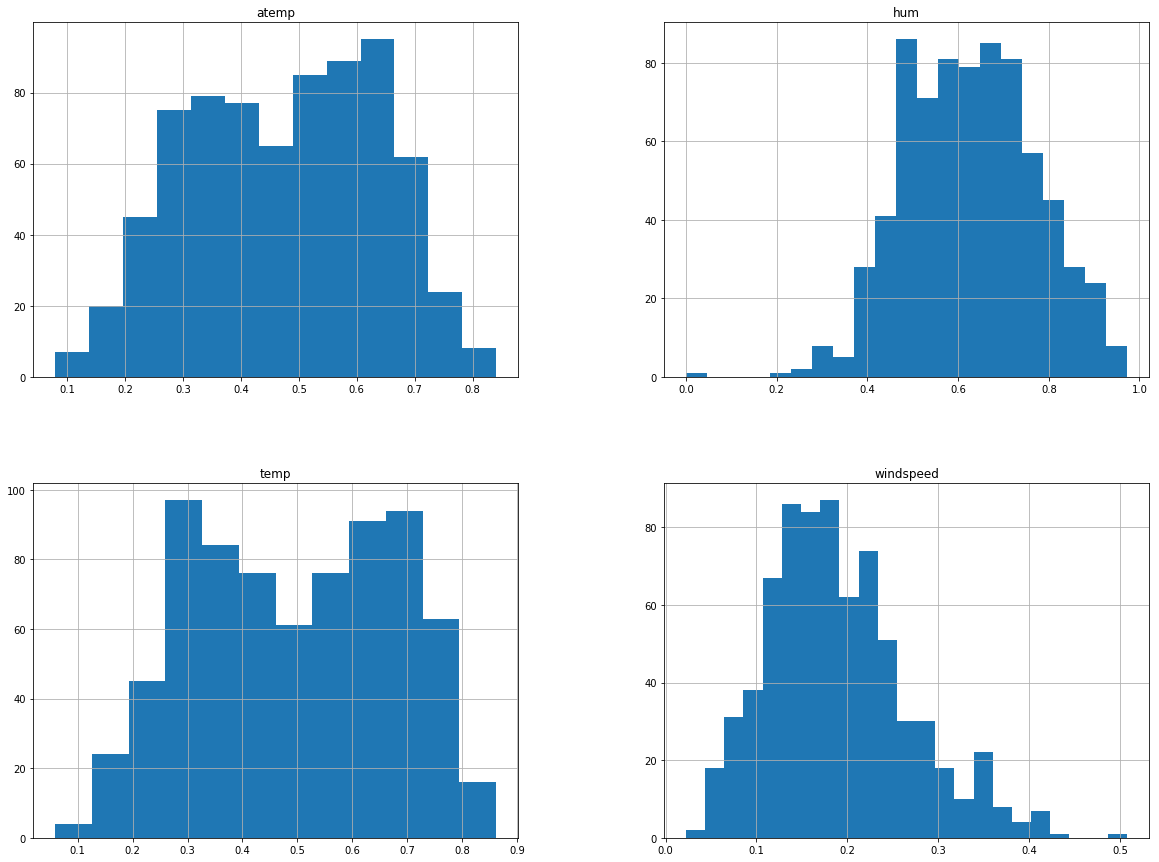

<Figure size 432x288 with 0 Axes>

In [141]:
num_bins = 'auto'
to_hist = ['atemp','temp','hum','windspeed']
graph_data_daily[to_hist].hist(bins=num_bins, figsize=(20, 15))

plt.show()
plt.savefig('myfig')

Text(0.5, 1.0, 'Humidity per Day')

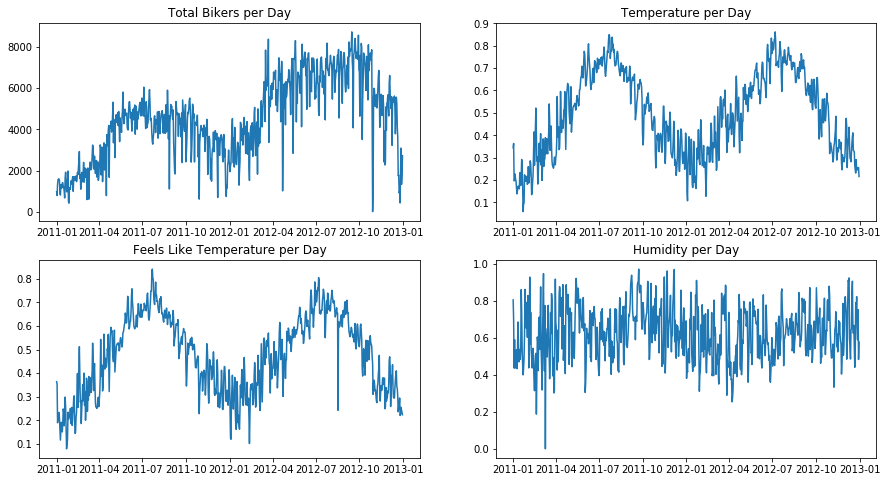

In [189]:
fig=plt.figure(figsize=(15,8))
plt.subplot(2,2, 1)
plt.plot(graph_data_daily['dteday'],graph_data_daily['cnt'])
plt.title('Total Bikers per Day')
plt.subplot(2, 2, 2)
plt.plot(graph_data_daily['dteday'],graph_data_daily['temp'])
plt.title('Temperature per Day')
plt.subplot(2, 2, 3)
plt.plot(graph_data_daily['dteday'],graph_data_daily['atemp'])
plt.title('Feels Like Temperature per Day')
plt.subplot(2, 2, 4)
plt.plot(graph_data_daily['dteday'],graph_data_daily['hum'])
plt.title('Humidity per Day')


In [117]:
# # sns.lineplot(x="dteday", y="cnt", hue="casual", data=hourly_raw_data[:100])
# df = daily_raw_data[:30].copy()
# df.set_index(df.dteday)
# # sns.tsplot(df.cnt)
# plt.plot( 'dteday', 'cnt', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'dteday', 'casual', data=df, marker='', color='maroon', linewidth=2)
# plt.plot( 'dteday', 'registered', data=df, marker='', color='olive', linewidth=2, linestyle='dashed')
# plt.legend()
# plt.show()

### HOURLY DATA visuals

In [113]:
# Making a copy of hourly data for graphs
graph_data_hourly=hourly_raw_data.copy()
graph_data_hourly["dteday"]=graph_data_hourly["dteday"].map(lambda x:  pd.to_datetime(x))

In [115]:
mpl_fig = plt.figure()
ax= plt.axes()
ax.plot(graph_data_hourly['dteday'],graph_data_hourly['cnt'])
ax.plot(graph_data_hourly['dteday'],graph_data_hourly['registered'])
ax.plot(graph_data_hourly['dteday'],graph_data_hourly['casual'])
#ax.legend(['cnt', 'registered', 'casual'], loc='upper left')
#ax.figure(figsize=(20,10))
# locator=MaxNLocator(prune='both',nbins=8)
# ax.xaxis.set_major_locator(locator)


plotly_fig=tls.mpl_to_plotly(mpl_fig)
plotly_fig['layout']['xaxis'] = {
   'tickmode': 'auto',
   'nticks': 10
    }
plotly_fig['layout']['showlegend'] = True
plotly_fig['layout'] = {'width':800}
plotly_fig['layout']['title'] = 'Hourly Bike Users'
py.iplot(plotly_fig,filename='Hourly_Bike_Users')

The draw time for this plot will be slow for clients without much RAM.


In [116]:

# import matplotlib.dates as mdates

# # Set the locator
# locator = mdates.MonthLocator()  # every month
# # Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')

# plt.figure(figsize=(20,10))
# plt.plot(graph_data_hourly['dteday'],graph_data_hourly['cnt'])
# plt.plot(graph_data_hourly['dteday'],graph_data_hourly['registered'])
# plt.plot(graph_data_hourly['dteday'],graph_data_hourly['casual'])
# plt.legend(['cnt', 'registered', 'casual'], loc='upper left')

# X = plt.gca().xaxis
# X.set_major_locator(locator)
# # Specify formatter
# X.set_major_formatter(fmt)

# plt.show()

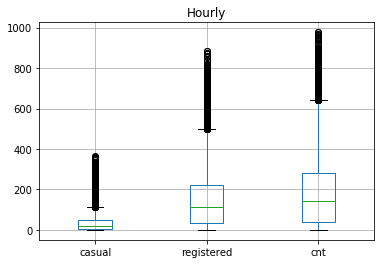

In [118]:
graph_data_hourly.boxplot(column = ['casual','registered','cnt'])
plt.title('Hourly')
plt.show()

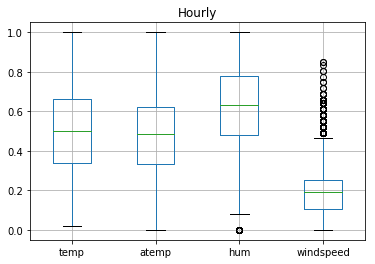

In [119]:
graph_data_hourly.boxplot(column = ['temp','atemp','hum','windspeed'])
plt.title('Hourly')
plt.show()

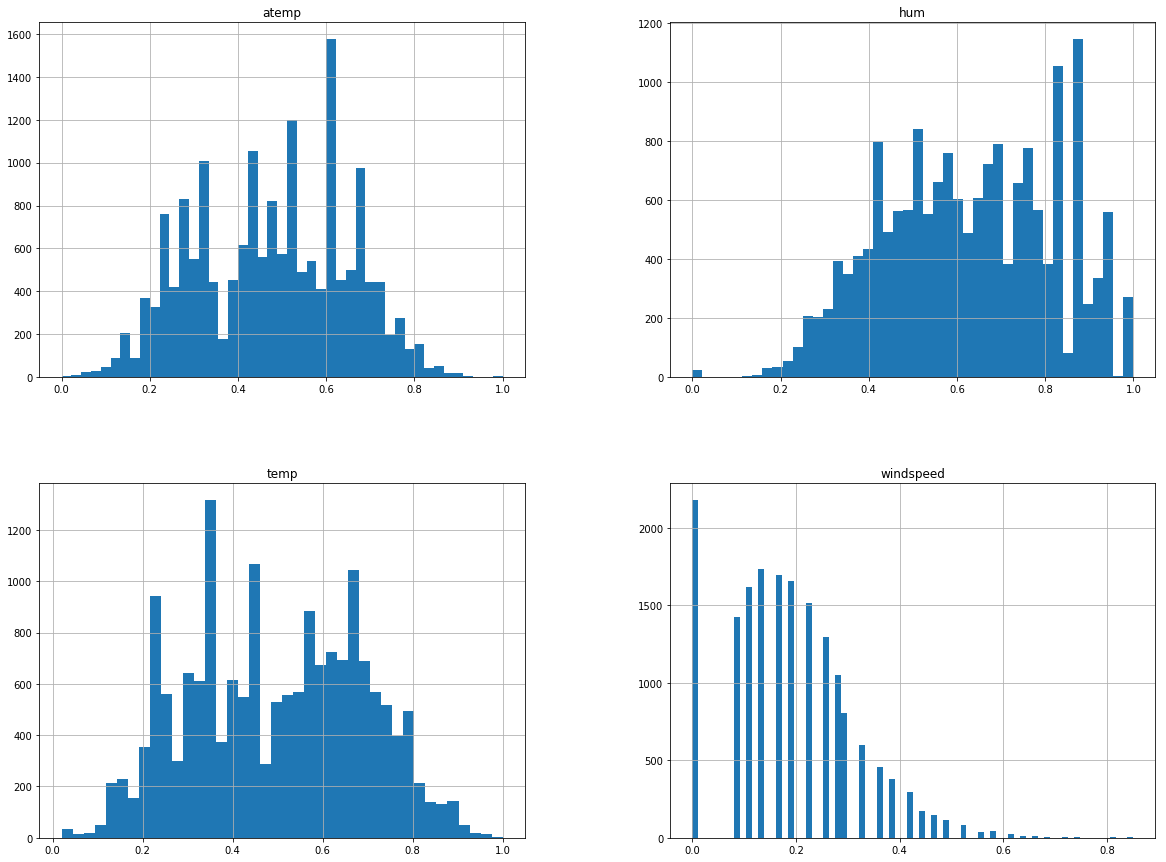

In [120]:
num_bins = 'auto'
to_hist = ['atemp','temp','hum','windspeed']
graph_data_hourly[to_hist].hist(bins=num_bins, figsize=(20, 15))

plt.show()

Text(0.5, 1.0, 'Humidity per Hour')

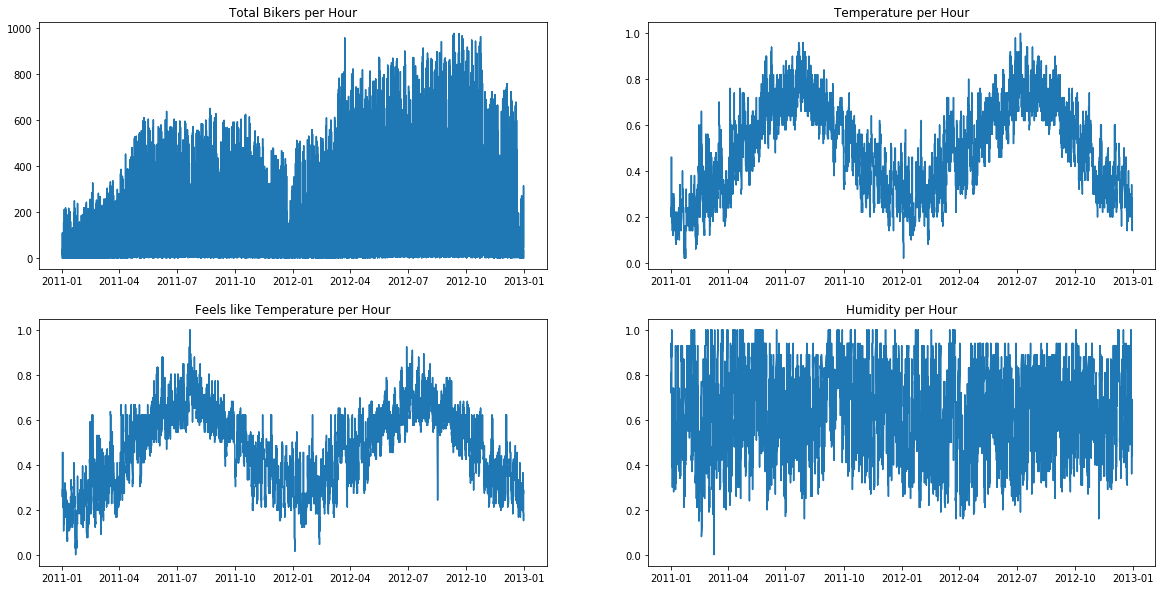

In [121]:
plt.figure(figsize=(20,10))
plt.subplot(2,2, 1)
plt.plot(graph_data_hourly['dteday'],graph_data_hourly['cnt'])
plt.title('Total Bikers per Hour')
plt.subplot(2, 2, 2)
plt.plot(graph_data_hourly['dteday'],graph_data_hourly['temp'])
plt.title('Temperature per Hour')
plt.subplot(2, 2, 3)
plt.plot(graph_data_hourly['dteday'],graph_data_hourly['atemp'])
plt.title('Feels like Temperature per Hour')
plt.subplot(2, 2, 4)
plt.plot(graph_data_hourly['dteday'],graph_data_hourly['hum'])
plt.title('Humidity per Hour')

In [122]:
graph_data_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


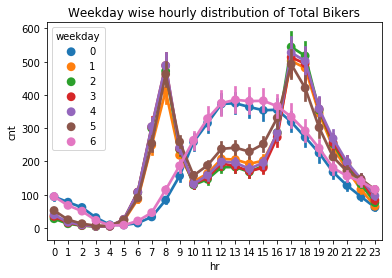

In [143]:
# Option 1 for weekend/weekday graph
fig,ax = plt.subplots()
sns.pointplot(data=graph_data_hourly[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of Total Bikers")

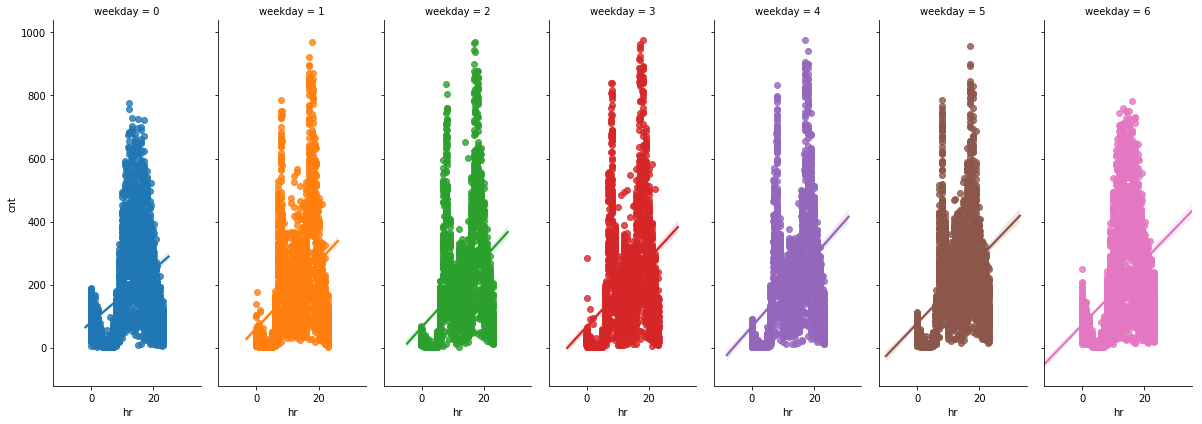

In [144]:
# option 2 for weekend/weekday graphs
g = sns.lmplot(x="hr", y="cnt", hue="weekday", col="weekday",
...                data=graph_data_hourly, height=6, aspect=.4, x_jitter=.1)

### EDA after spliting

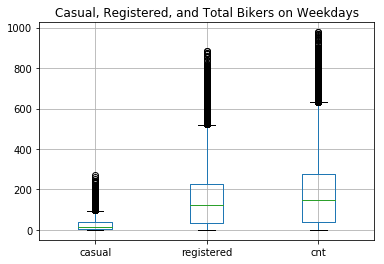

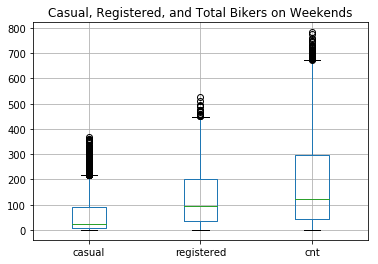

In [133]:
wd_hr.boxplot(column = ['casual','registered','cnt'])
plt.title('Casual, Registered, and Total Bikers on Weekdays')
plt.show()
we_hr.boxplot(column = ['casual','registered','cnt'])
plt.title('Casual, Registered, and Total Bikers on Weekends')
plt.show()

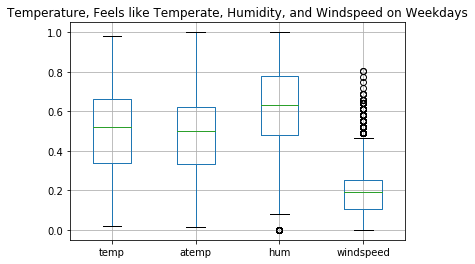

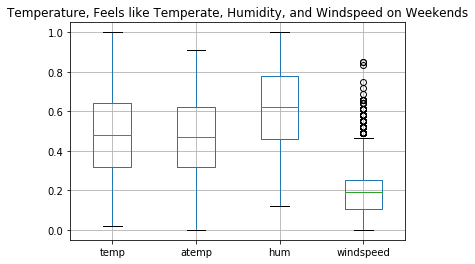

In [134]:
wd_hr.boxplot(column = ['temp','atemp','hum','windspeed'])
plt.title('Temperature, Feels like Temperate, Humidity, and Windspeed on Weekdays')
plt.show()
we_hr.boxplot(column = ['temp','atemp','hum','windspeed'])
plt.title('Temperature, Feels like Temperate, Humidity, and Windspeed on Weekends')
plt.show()

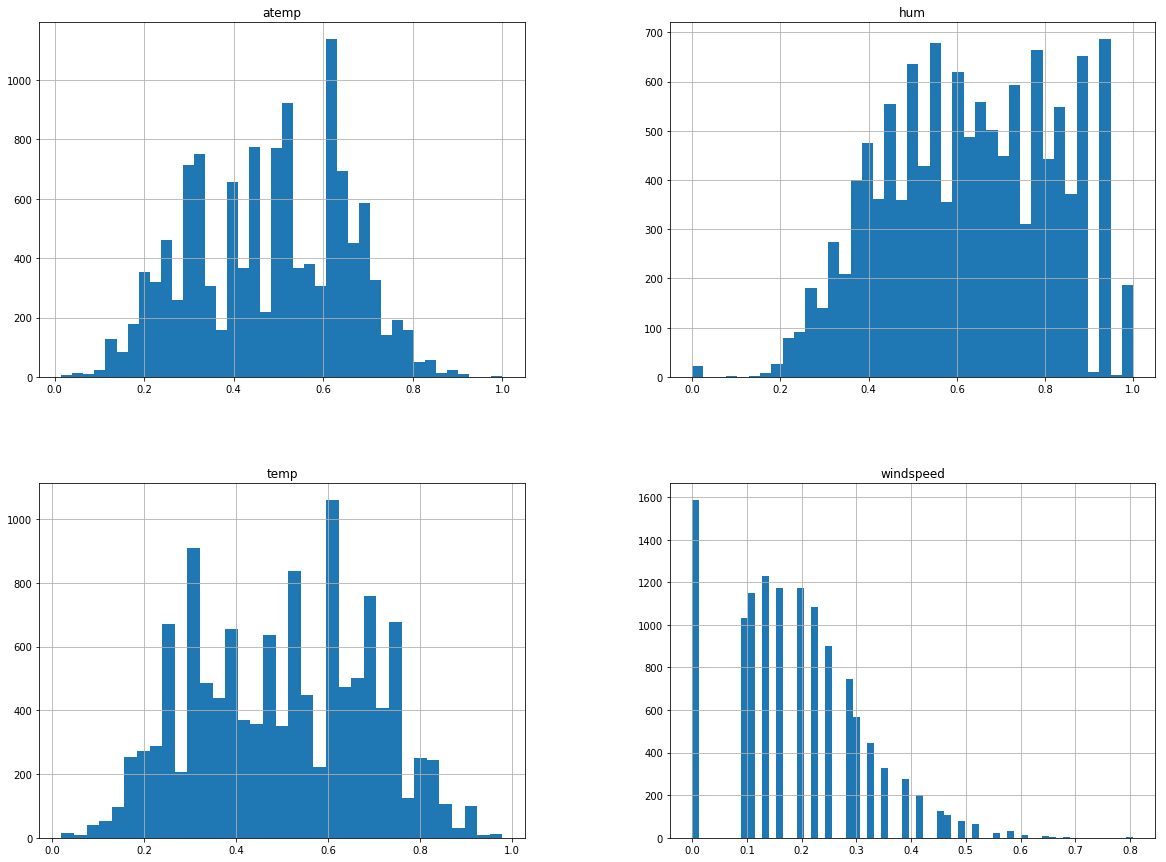

In [135]:
num_bins = 'auto'
to_hist = ['atemp','temp','hum','windspeed']
wd_hr[to_hist].hist(bins=num_bins, figsize=(20, 15))

plt.show()

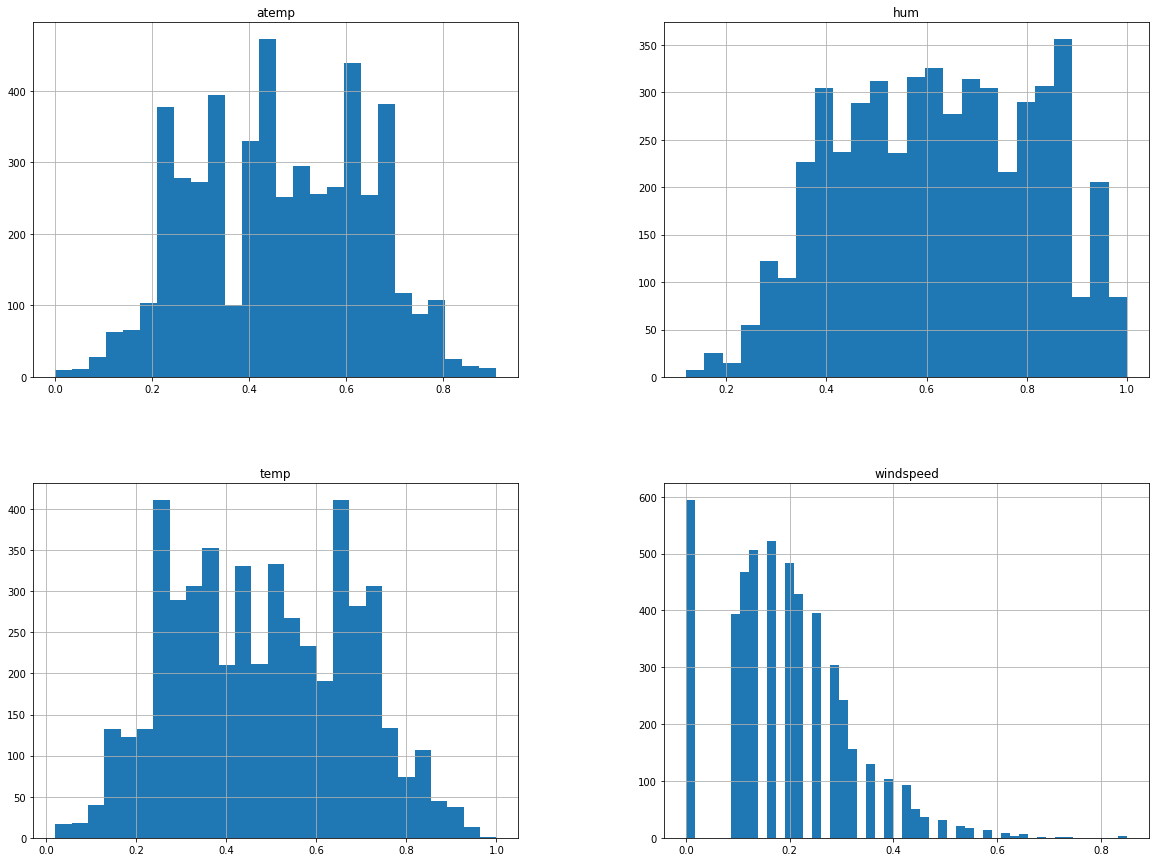

In [136]:
num_bins = 'auto'
to_hist = ['atemp','temp','hum','windspeed']
we_hr[to_hist].hist(bins=num_bins, figsize=(20, 15))

plt.show()

Text(0.5, 1.0, 'Humidity on Weekday')

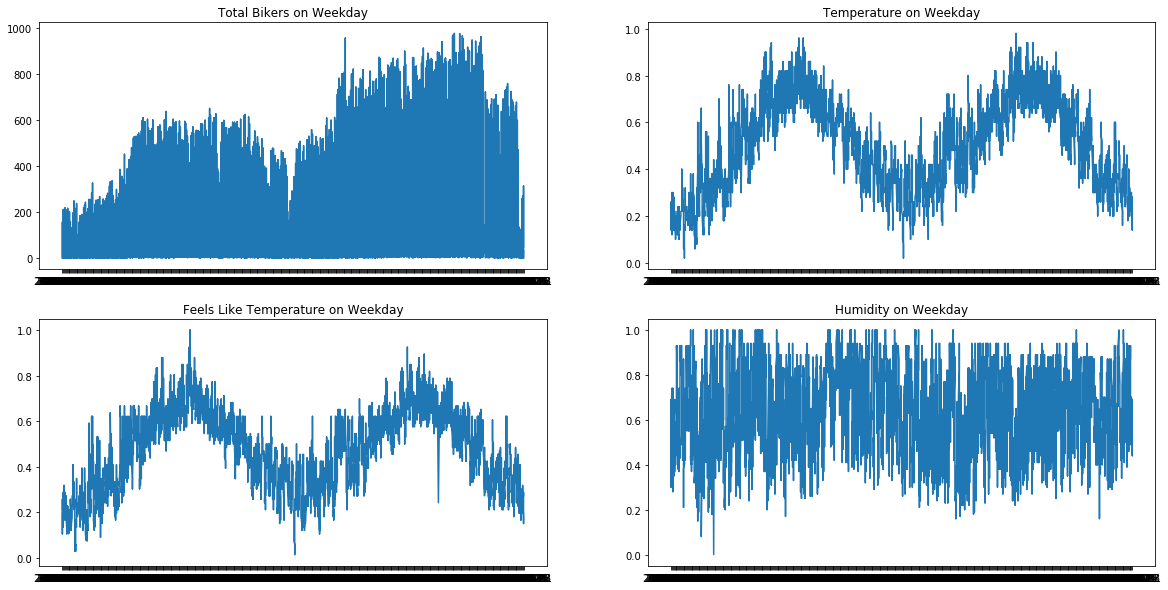

In [137]:
plt.figure(figsize=(20,10))
plt.subplot(2,2, 1)
plt.plot(wd_hr['dteday'],wd_hr['cnt'])
plt.title('Total Bikers on Weekday')
plt.subplot(2, 2, 2)
plt.plot(wd_hr['dteday'],wd_hr['temp'])
plt.title('Temperature on Weekday')
plt.subplot(2, 2, 3)
plt.plot(wd_hr['dteday'],wd_hr['atemp'])
plt.title('Feels Like Temperature on Weekday')
plt.subplot(2, 2, 4)
plt.plot(wd_hr['dteday'],wd_hr['hum'])
plt.title('Humidity on Weekday')

Text(0.5, 1.0, 'Humidity on Weekend')

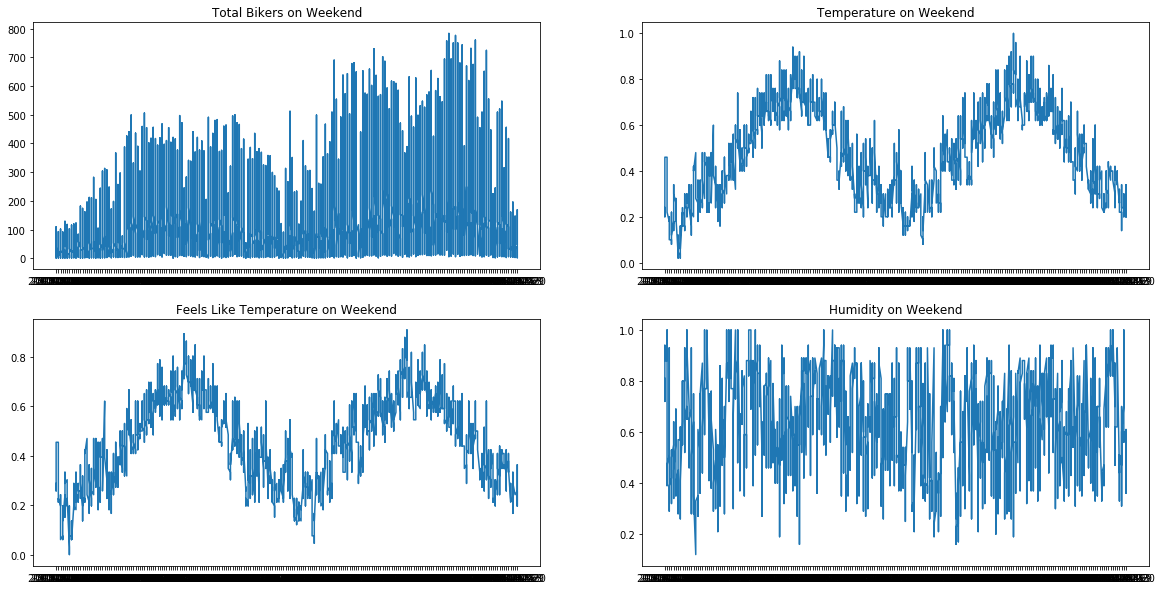

In [138]:
plt.figure(figsize=(20,10))
plt.subplot(2,2, 1)
plt.plot(we_hr['dteday'],we_hr['cnt'])
plt.title('Total Bikers on Weekend')
plt.subplot(2, 2, 2)
plt.plot(we_hr['dteday'],we_hr['temp'])
plt.title('Temperature on Weekend')
plt.subplot(2, 2, 3)
plt.plot(we_hr['dteday'],we_hr['atemp'])
plt.title('Feels Like Temperature on Weekend')
plt.subplot(2, 2, 4)
plt.plot(we_hr['dteday'],we_hr['hum'])
plt.title('Humidity on Weekend')

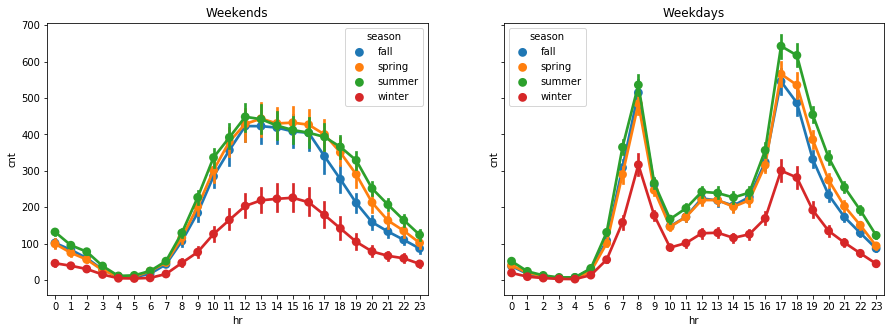

In [180]:
fig,ax = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5))
#plt.figure(figsize=(1000,1000))
sns.pointplot(data=we_hr[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax[0])
sns.pointplot(data=wd_hr[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax[1])
ax[0].set(title="Weekends")
ax[1].set(title="Weekdays")
plt.show()
fig.savefig('test2')

### Correlation Matrix

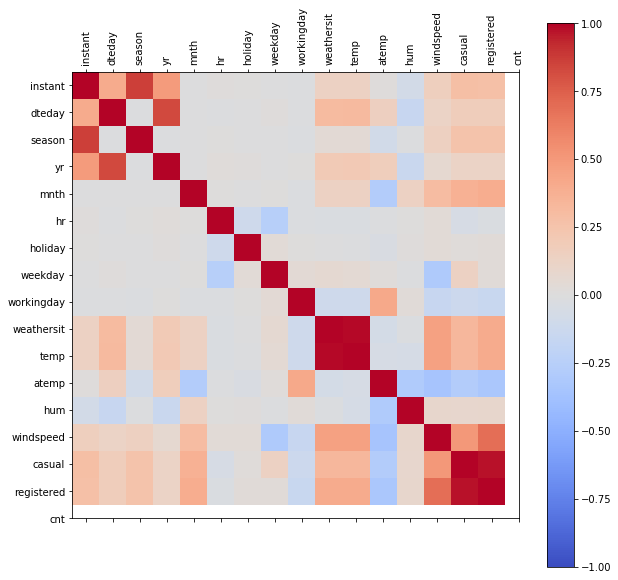

In [16]:
#Hourly
plt.rcParams["figure.figsize"] = (10,10)
corr = hourly_raw_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(hourly_raw_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(hourly_raw_data.columns)
ax.set_yticklabels(hourly_raw_data.columns)
plt.show()

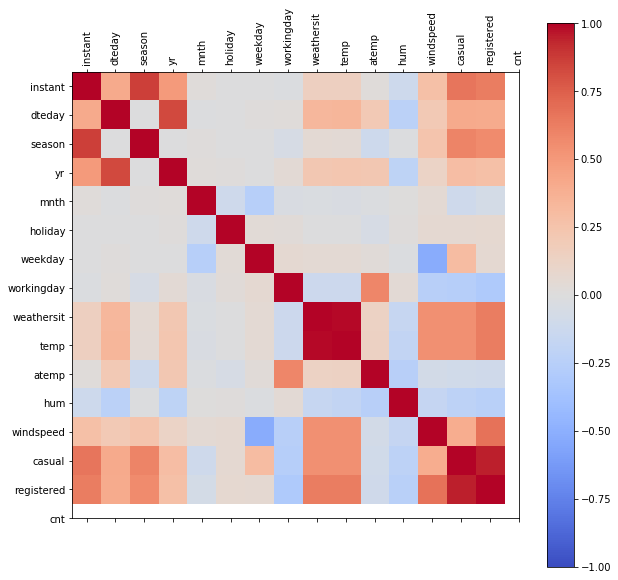

In [15]:
#Daily
plt.rcParams["figure.figsize"] = (10,10)
corr = daily_raw_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(daily_raw_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(daily_raw_data.columns)
ax.set_yticklabels(daily_raw_data.columns)
plt.show()

# Data transformation

### Converting `dteday` to date

In [6]:
daily_raw_data['dteday']=pd.to_datetime(daily_raw_data['dteday'], format='%Y-%m-%d')
hourly_raw_data['dteday']=pd.to_datetime(hourly_raw_data['dteday'], format='%Y-%m-%d')
hourly_raw_data['dteday'].head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]

## Add `isDaylight` and  `isNoon` for hourly data

In [7]:
hourly_raw_data['isDaylight']=0
hourly_raw_data['isNoon']=0

hourly_raw_data = hourly_raw_data.apply(lambda x: isDaylight(x), axis=1)
hourly_raw_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,isDaylight,isNoon
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,0


### Check (and fix?) skewness

In [8]:
check_skewness(hourly_raw_data, ['atemp','temp','hum','windspeed'])

atemp skewness p-value : -0.09042105336080838
temp skewness p-value : -0.00602036366695605
hum skewness p-value : -0.1112775438226877
windspeed skewness p-value : 0.5748555816221624

------

skewed_features:
[]


### Adding the temp atemp windspeed hum relative to the last 7 days value

In [9]:
to_relative  = ['temp', 'atemp', 'hum','windspeed']
hourly_raw_data = relative_values(hourly_raw_data, to_relative)

### Spliting weekends weekdays and arranging the names

In [132]:
wd_hr = num_name(hourly_raw_data.loc[(~hourly_raw_data['weekday'].isin([0,6]) )])
we_hr = num_name(hourly_raw_data.loc[(hourly_raw_data['weekday'].isin([0,6]) )])

### Adding the mean per hour for the past 2 weeks

In [55]:
wd_hr= mean_per_hour_2weeks(wd_hr)
we_hr = mean_per_hour_2weeks(we_hr)

### One hot Encoding
For `season`, `weathersit`, `mnth`,`weekday`,`hr`

In [56]:
category  = ['season', 'weathersit', 'mnth','weekday','hr']

wd_h = onehot_encode(wd_hr,category)
wd_h  = wd_h.drop('instant',axis=1)

we_h = onehot_encode(we_hr,category)
we_h  = we_h.drop('instant',axis=1)

### Genetic Programming

In [57]:
we_h = Genetic_P(we_h.drop(['registered','casual','dteday'],axis=1),'cnt')
wd_h = Genetic_P(wd_h.drop(['registered','casual','dteday'],axis=1),'cnt')

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.13 0.11738933907856036        3 0.9040635088192193 0.8779026725412286     25.95s
   1     6.49 0.3861285563373948        3 0.9052611747338453 0.8620950905739327     38.53s
   2     4.44 0.7436519315672128        9 0.9069892000167931 0.8630429158302059     45.33s
   3      2.3 0.8548377965338426        3 0.9085080044124246 0.8447536002622984     46.78s
   4     1.54 0.8811861270270145        1 0.9072835838019927 0.848928471650333     45.03s
   5     1.27 0.8880454399309999        1 0.9078683762887516 0.8455789208838854     42.55s
   6     1.15 0.8943970729977523        1 0.9072386548623287 0.8527776645257942     40.25s
   7     1.09 0.8954390188313005        1 0.9073098857419816 0.8498927674288788     37.51s
   8     1.06 0.89444271476

In [58]:
dd = hourly_raw_data.loc[(~hourly_raw_data['weekday'].isin([0,6]) )]['dteday']
de = hourly_raw_data.loc[(hourly_raw_data['weekday'].isin([0,6]) )]['dteday']
we_h = pd.concat([pd.DataFrame(we_h ),pd.DataFrame(de)],axis=1 ,join = 'inner') 
wd_h = pd.concat([pd.DataFrame(wd_h ),pd.DataFrame(dd)],axis=1 ,join = 'inner') 

In [59]:
we_h['mean_per_hour']

29         2.000000
30         3.000000
31         8.000000
32        14.000000
33        36.000000
34        56.000000
35        84.000000
36        94.000000
37       106.000000
38       110.000000
39        93.000000
40        67.000000
41        35.000000
42        37.000000
43        36.000000
44        34.000000
45        28.000000
46        39.000000
161       17.000000
162       17.000000
163        9.000000
164        6.000000
165        3.000000
167        2.000000
168        2.000000
169        8.000000
170       17.000000
171       44.500000
172       63.000000
173       88.500000
            ...    
17325    176.000000
17326    142.000000
17327    121.000000
17328    115.000000
17329     96.666667
17330     71.666667
17331     67.666667
17332     64.166667
17333     49.000000
17334     21.833333
17335      6.833333
17336      5.666667
17337      8.666667
17338     25.833333
17339     66.166667
17340    108.333333
17341    166.833333
17342    215.666667
17343    262.500000


### Correlation Matrix (After hot encoding)

In [ ]:
# Daily
plt.rcParams["figure.figsize"] = (12,8)
corr = daily.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(daily.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(daily.columns)
ax.set_yticklabels(daily.columns)
plt.show()

In [ ]:
#Hourly
plt.rcParams["figure.figsize"] = (12,8)
corr = hourly.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(hourly.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(hourly.columns)
ax.set_yticklabels(hourly.columns)
plt.show()

# Modeling (Baseline)

## Splitting train test

In [60]:
xwe_Train = we_h[we_h['dteday'] < '2012-10-01'].drop(['cnt','dteday'],axis=1)## NONE OF THst_EM IN DATA
xwe_Test = we_h[we_h['dteday'] >= '2012-10-01'].drop(['cnt','dteday'],axis=1)## NONE OF THEM IN DATA
ywe_cnt_test =we_h['cnt'][we_h['dteday'] >= '2012-10-01']
ywe_cnt_train =we_h['cnt'][we_h['dteday'] < '2012-10-01']

xwd_Train = wd_h[wd_h['dteday'] < '2012-10-01'].drop(['cnt','dteday'],axis=1)## NONE OF THst_EM IN DATA
xwd_Test = wd_h[wd_h['dteday'] >= '2012-10-01'].drop(['cnt','dteday'],axis=1)## NONE OF THEM IN DATA
ywd_cnt_test =wd_h['cnt'][wd_h['dteday'] >= '2012-10-01']
ywd_cnt_train =wd_h['cnt'][wd_h['dteday'] < '2012-10-01']

In [ ]:
# X_Train = hourly[hourly['dteday'] < '2012-10-01'].drop(['cnt','dteday'],axis=1)## NONE OF THst_EM IN DATA
# X_Test = hourly[hourly['dteday'] >= '2012-10-01'].drop(['cnt','dteday'],axis=1)## NONE OF THEM IN DATA
# Y_cnt_test =hourly['cnt'][hourly['dteday'] >= '2012-10-01']
# Y_cnt_train =hourly['cnt'][hourly['dteday'] < '2012-10-01']

In [ ]:
# Create linear regression object
regr = LinearRegression(fit_intercept =True)
regr.fit(X2_Train, y_cas_train)
y_pred = regr.predict(X2_Test)
r2_score(y_cnt_test,y_reg_test + y_pred)
##regr.score(X2_Test, y_cnt_test)

In [ ]:
params = pd.Series(regr.coef_, index=X2_Train.columns)

Linear Models

In [79]:
##Linear Regression
lm_parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True]}
tscv = TimeSeriesSplit(n_splits=5)
lme = GridSearchCV(LinearRegression(),
                                 param_grid=lm_parameters,
                                 cv=tscv,return_train_score=True)

lme.fit(xwe_Train, ywe_cnt_train)
ywe_pred = lme.predict(xwe_Test)
print(r2_score(ywe_cnt_test, ywe_pred))

0.8481343198407127


In [65]:
##Linear Regression
lm_parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True]}
tscv = TimeSeriesSplit(n_splits=5)
lmd = GridSearchCV(LinearRegression(),
                                 param_grid=lm_parameters,
                                 cv=tscv,return_train_score=True)

lmd.fit(xwd_Train, ywd_cnt_train)
ywd_pred = lmd.predict(xwd_Test)
print(r2_score(ywd_cnt_test, ywd_pred))

0.8383031621885118


In [ ]:
polynomial_features=PolynomialFeatures(degree=2)
xwe_Train_poly=polynomial_features.fit_transform(xwe_Train)
xwe_Test_poly=polynomial_features.fit_transform(xwe_Test)

lm_parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True]}
tscv = TimeSeriesSplit(n_splits=5)
lme = GridSearchCV(LinearRegression(),
                                 param_grid=lm_parameters,
                                 cv=tscv,return_train_score=True)

lme.fit(xwe_Train_poly, ywe_cnt_train)
ywe_pred = lme.predict(xwe_Test_poly)
print(r2_score(ywe_cnt_test, ywe_pred))

In [ ]:
##OrthogonalMatchingPursuit
omp_parameters = {'n_nonzero_coefs':[5,10,15],'fit_intercept':[True,False], 'normalize':[True,False]}
tscv = TimeSeriesSplit(n_splits=5)
omp = GridSearchCV(OrthogonalMatchingPursuit(),
                                 param_grid=omp_parameters,
                                 cv=tscv,return_train_score=True)

omp.fit(X_Train, Y_cnt_train)
omp.cv_results_
omp.score(X_Test, Y_cnt_test)

Random Forest Model

In [81]:
tscv = TimeSeriesSplit(n_splits=5)
RF_parameters = {'n_estimators': [10, 30 ,100],
                                             'bootstrap': [True],
                                             'max_depth': [80, 100 ,150 ],
                                             'max_features': ['sqrt',16 , 32],
                                             'min_samples_leaf': [2,  5 , 8],
                                             'min_samples_split': [ 10 , 8 , 15],
                                            'random_state':[random_seed],
                                            'criterion':['mse']}
rfe = GridSearchCV(RandomForestRegressor(),
                                 param_grid= RF_parameters,
                                 cv=tscv)
rfe.fit(xwe_Train, ywe_cnt_train)
ywe_pred = rfe.predict(xwe_Test)
print(r2_score(ywe_cnt_test, ywe_pred))

0.8606858646909712


In [88]:
r2_score(np.concatenate(ywe_cnt_test,ywd_cnt_test),np.concatenate((ywe_pred ,ywd_pred)) )

TypeError: 'Series' object cannot be interpreted as an integer

In [74]:
tscv = TimeSeriesSplit(n_splits=5)
RF_parameters = {'n_estimators': [10, 30 ,100],
                                             'bootstrap': [True],
                                             'max_depth': [80, 100  ,150],
                                             'max_features': ['sqrt',16,32],
                                             'min_samples_leaf': [2,  5 , 8],
                                             'min_samples_split': [ 10 , 8 , 15],
                                            'random_state':[random_seed],
                                            'criterion':['mse']}
rfd = GridSearchCV(RandomForestRegressor(),
                                 param_grid= RF_parameters,
                                 cv=tscv)
rfd.fit(xwd_Train, ywd_cnt_train)

0.7655003176347412


In [75]:
ywd_pred = rfd.predict(xwd_Test)
print(r2_score(ywd_cnt_test, ywd_pred))

0.8263872865849389


K- Nearest Neighbors

In [70]:
knn_parameters = {'n_neighbors':[5,10,15],'weights':['uniform'], 'algorithm':['auto'],'leaf_size':[20,30],
                  'p':[1,2,3],'metric':['minkowski']}
tscv = TimeSeriesSplit(n_splits=5)
knn = GridSearchCV(KNeighborsRegressor(),
                                 param_grid=knn_parameters,
                                 cv=tscv,return_train_score=True)

knn.fit(xwe_Train, ywe_cnt_train)
ywe_pred = knn.predict(xwe_Test)
print(r2_score(ywe_cnt_test, ywe_pred))

0.7228663539405159


In [69]:
knn_parameters = {'n_neighbors':[5,10,15],'weights':['uniform'], 'algorithm':['auto'],'leaf_size':[20,30],
                  'p':[1,2,3],'metric':['minkowski']}
tscv = TimeSeriesSplit(n_splits=5)
knn = GridSearchCV(KNeighborsRegressor(),
                                 param_grid=knn_parameters,
                                 cv=tscv,return_train_score=True)

knn.fit(xwd_Train, ywd_cnt_train)
ywd_pred = knn.predict(xwd_Test)
print(r2_score(ywd_cnt_test, ywd_pred))

0.7655003176347412


In [91]:
ywd_pred = knn.predict(xwd_Test)
print(r2_score(ywd_cnt_test + ywe_cnt_test, ywd_pred + ywe_pred))

0.7891637696664624
